In this problem set we are going to make use of `pandas` to analyze the effect of a fictuous experiment I have added to a data set. The data will be using is the sample data provided by Yelp. The goal is to familiarize ourselves with working with such datasets.

[Download notebook :fontawesome-solid-download:](../hw-quasi.ipynb){: .md-button .md-button--primary download="hw-quasi.ipynb"}

The original data is available here: [Yelp data](https://www.yelp.com/dataset/download).
However for this homework you will have to use the data I constructed from the original sample. You can download such file here: 

 - **homework data**: [hw-yelp.tar.gz](http://econ21340.lamadon.com/hw-yelp.tar.gz) (~2.6Go)

Note that on windows you can use [7zip](https://www.7-zip.org/download.html) to uncompress that file. On OSX and linux you can simply use `tar -cxvf hw-yelp.tar.gz`

In the data I have introduced an experiment. The back sotry is that Yelp rolled out a new interface for a randomly select group of users. These uses were randomly selected among users that posted a review in the month of January 2010. The `id` of these users in listed in the `yelp_academic_dataset_review_treatment.json` file present in the archive.

For this group of user a the new website interface was put in place on February 1st 2010. As a Yelp employee you are asked to analyze the impact of a new app. The company is interested in the effect on user engagement which is measured by rating activity. We will focus on the number of ratings.

In this homework we will cover:
 1. loading large data using streaming/chunks, learn about json
 - working with date in pandas
 - analyze randomly assigned treatment
 - construct comparable control group
 - analyze at the level of randomization
 
some useufl links:
 - [tutorial on dates in pandas](https://pbpython.com/pandas-grouper-agg.html)
 - [pandas documentation on reshaping](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)
 - [yelp data documentation](https://www.yelp.com/dataset/documentation/main)

We start with a simple list of imports, as well as defining the path to the file we will be using. Please update the paths to point to the correct location on your computer.

In [1]:
import os
import pandas as pd
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_review = os.path.expanduser("~/mystuff/uchicago-31340-psets/Quasi_Pset/yelp_academic_dataset_review_experiment.json")
file_treatment = os.path.expanduser("~/mystuff/uchicago-31340-psets/Quasi_Pset/yelp_academic_dataset_review_treatment.json")

def file_len(fname):
    """ Function which efficiently computes the number of lines in file"""
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1
file_review

'/Users/connorjones/mystuff/uchicago-31340-psets/Quasi_Pset/yelp_academic_dataset_review_experiment.json'

You are already familiar with the following section, this is the code that loads my solution. Since you don't have the file, this part of the code won't work for you. 


# Loading the yelp review data

The data is stored in `json` format. This is a widely used format to store structured data. See [here](https://www.w3schools.com/python/python_json.asp) for working with json in general in python.

The data itself is quite large, hence we are going to use the `chunksize` argument of the `read_json` function of `pandas`. You can of course try for your self to directly load the data by using `pd.read_json(file_review)`, this however might take a while!

In the following section I provide a code example that loads the business information using chunks of size `100,000`. The code **contains a few errors**. Use the data documentation (using the link in the intro) to fix the code a load the data. The code also drops variables which will be very needed and keep some others that are just going to clutter your computer memory. Again, look at the documentation and at the questions ahead to keep the right set of variables.


Note how the code first compute the length of the file 

```python
size = 100000
review = pd.read_json(filepath, lines=True,
                      dtype={'review_id':str,
                             'user_id':float,
                             'business_id':str,
                             'stars':int,
                             'date':str,
                             'text':float,
                             'useful':int,
                             'funny':str,
                             'cool':int},
                      chunksize=size)

chunk_list = []
for chunk_review in tqdm.tqdm(review,total=  np.ceil(file_len(filepath)/size )  ):
    # Drop columns that aren't needed
    chunk_review = chunk_review.drop(['review_id','date'], axis=1)
    chunk_list.append(chunk_review)

df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)
```

The following runs my version of the code, it takes around 2 minutes on my laptop. I show you a few of the columns that I chose to extract. In particular, you can check that you get the right row count of `7998013`. 

In [2]:
def jones_question1(filepath):
    size = 100000
    review = pd.read_json(filepath, lines=True,
                          dtype={'review_id':str,
                                 'user_id':float,
                                 'business_id':str,
                                 'stars':int,
                                 'date':str,
                                 'text':float,
                                 'useful':int,
                                 'funny':str,
                                 'cool':int},
                          chunksize=size)

    chunk_list = []
    for chunk_review in tqdm.tqdm(review,total=  np.ceil(file_len(filepath)/size )  ):
        chunk_review = chunk_review.drop(['text','useful','funny','cool'], axis=1)
        chunk_list.append(chunk_review)
    
    df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)
    return df;

In [3]:
df_review = jones_question1(file_review)
df_review['date'] = pd.to_datetime(df_review.date) # convert the date string to an actual date
df_review[['review_id','user_id','date']]

100%|██████████| 80/80.0 [01:44<00:00,  1.30s/it]


,review_id,user_id,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,2017-01-14 21:56:57
...,...,...,...
7998008,LAzw2u1ucY722ryLEXHdgg,6DMFD3BRp-MVzDQelRx5UQ,2019-12-11 01:07:06
7998009,gMDU14Fa_DVIcPvsKtubJA,_g6P8H3-qfbz1FxbffS68g,2019-12-10 04:15:00
7998010,EcY_p50zPIQ2R6rf6-5CjA,Scmyz7MK4TbXXYcaLZxIxQ,2019-06-06 15:01:53
7998011,-z_MM0pAf9RtZbyPlphTlA,lBuAACBEThaQHQGMzAlKpg,2018-07-05 18:45:21


# Our first plot of the data

Next, to get a sense of the data, we plot the user engagement over time. For this I ask you to plot the log number of reviews per month using our created data. 

To get to the result I recommend you look into either the `resample` menthod or the `grouper` method. If you are not too familiar with them, I added a link at the top to a great tutorial.

In [4]:
def jones_question2(dataframe):
    df_test = dataframe
    df_test = df_test.set_index('date').resample('M')["user_id"].agg('count')
    df_test = df_test.to_frame()

    y = np.log(df_test.user_id + 1)
    x = df_test.index
    plt.plot(x,y)
    plt.xlabel("date")
    plt.ylabel("log user_id")
    plt.title("log number of reviews per months")
    plt.show()
    return;

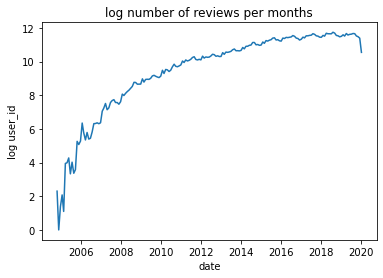

In [5]:
jones_question2(df_review)

# A randomized experiment

We now want to extract our experimental data from our large data set. Given the random assignment we are going to compare the treated group to simply everyone else in the data. In this exercice, we are interested in the effect of the policy overt time. We are then going to look at the log number of reviews in each of the month around the introduction of the interface change.

I would like for you to do the following:
 1. extract the list of treated individuals from the provided file
 2. attach the treated status to each observation in the data, you can use `eval` or a merge.
 3. plot the log number of reviews per month in the treatment and in the control group. 
 4. given that the treatment status was randomized, the picture should look a bit surpising, please explain what you would have expected to see.
 
Here is the plot I get, try to reproduce it as closely as possible.

In [6]:
def jones_question3(total, treat):
    df_treatment = pd.read_json(treat, lines=True)
    df_treatment = df_treatment.rename(columns={0: "user_id"})
    df_treatment['user_treat'] = 1

    ust = pd.read_json(treat, lines=True)
    ust_list = list(ust[0])
    
    df_merge = total
    df_merge = pd.merge(df_merge, df_treatment, how='outer')
    df_merge['user_treat'] = df_merge['user_treat'].fillna(0)
        
    df_test = total
    df_test = df_test.set_index('date').resample('M')["user_id"].agg('count')
    df_test = df_test.to_frame()
    
    df_subgroup = df_merge[df_merge['user_treat'] == 1]
    df_subgroup = df_subgroup.set_index('date').resample('M')["user_id"].agg('count')
    df_subgroup = df_subgroup.to_frame()
    
    y = np.log(df_test.user_id+1)
    x = df_test.index
    z = np.log(df_subgroup.user_id+1)
    
    plt.plot(x,y, label="Total")
    plt.plot(x,z, label="Treat")
    plt.title("log number of reviews per months treated and untreated")
    plt.show()
    
    return ust_list, df_merge;

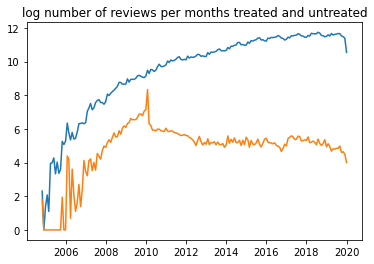

In [7]:
# df_local returns all entries with a column treated, user_treat is the list of treated user_id
user_treat,df_local = jones_question3(df_review, file_treatment)

In [8]:
df_local

,review_id,user_id,business_id,stars,date,user_treat
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,2015-04-15 05:21:16,0.0
1,SjfnCrMCgOiWafnQuCKlhw,OwjRMXRC0KyPrIlcjaXeFQ,9SU7ZZhaFUJJ6m2k5HKHeg,1,2015-03-19 06:17:28,0.0
2,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,2013-12-07 03:16:52,0.0
3,5VS8E8Ys3IhQRJU3nW8YtQ,nIJD_7ZXHq-FX8byPMOkMQ,IsN0qEzgAXBjbT3qn6lokA,4,2009-02-04 17:36:27,0.0
4,T0JLHmc_1Nt_Uv2DNmzhhA,nIJD_7ZXHq-FX8byPMOkMQ,jJDnxINrCKstFyeH3F8Cfw,2,2013-11-11 20:46:13,0.0
...,...,...,...,...,...,...
7998008,3gDrj6ybT6mNKtIzhTeThw,T85j1MMV_DJQd3gWQ1zt6w,FEC44uuZ4_FeDYZ-vTCQAg,1,2019-12-09 18:57:49,0.0
7998009,b2nh40wvzDHry1A_9tT_9w,pjj4Y76C7jHNpH4WOG6slQ,QayOwK3LVRVniGnT6Gzveg,1,2019-12-10 00:39:24,0.0
7998010,JG54LGja8KUHuS2q-zvfSA,bQ9vOHi0E0Jx-PGBuxfYPw,-PgCEAY-y-deyD__ykLNug,5,2019-12-11 02:42:42,0.0
7998011,N50u_bwOhkrNnzDByvH0IA,4qNXmOeA5tALz3DgtHoAYA,joZGNAL7lKyazSzxkOAi6Q,5,2019-01-14 22:27:52,0.0


### Question 3.4
The picture is surprising because we selected a random pool of users for the treatment which would be expected to produce a representive sample of the overall user data.  However, in the picture there appears to be a shift around 2010 when the treatment group user numbers appear to start reverting to a different mean than the total sample.  This suggests that there was an error when randomly selecting the samples.

# Changing comparaison group

We clearly created some issues in the way we analyzed our sample. In this section we are going to use a more comparable group. 

 1. using the criteria descriged in the intro, construct the original set of users from which the treatment group was selected. 
 - extracts the users from the this group wich are not in the treatment group, this will be our control group.
 - using this new control group, plot the log number of reviews in each **quarter** for treatment and control
 - finally plot the outcome in difference, however make sure to remove the log-number of individual from each group to plot the log number of reviews per user, overwise your intercept won't be around 0!
 
Here are the plots I got: 

In [9]:
def jones_question4(df_local, ust):
    control = df_local[df_local.date.dt.year == 2010]
    control = control[control.date.dt.month == 1]
    control = control[control['user_treat'] == 0]
    syn_con = pd.DataFrame(control.user_id.unique())
    syn_con = syn_con.rename(columns={0: "user_id"})
    syn_con['control'] = 1
    merge = pd.merge(df_local, syn_con, how='outer')
    merge['control'] = merge['control'].fillna(0)
    merge

    control = merge[merge['control'] == 1]
    control = control.set_index('date').resample('Q')["user_id"].agg('count')
    control = control.to_frame()

    treat = merge[merge['user_treat'] == 1]
    treat = treat.set_index('date').resample('Q')["user_id"].agg('count')
    treat = treat.to_frame()

    y = np.log(control.user_id+1)
    x = control.index
    a = treat.index
    z = np.log(treat.user_id+1)

    plt.plot(x,y, label = "Control")
    plt.plot(a,z, label = "Treat")
    plt.title("log number of reviews per months treated and untreated")
    plt.show()
    
    c = z - np.log(1500)
    d = y - np.log(3346)
    
    e = c - d
    
    plt.plot(a,e)
    plt.title("diff in reviews per user: treat - control")
    plt.show()
    
    final = merge[(merge['control'] == 1) | (merge['user_treat'] == 1)]
    return final;

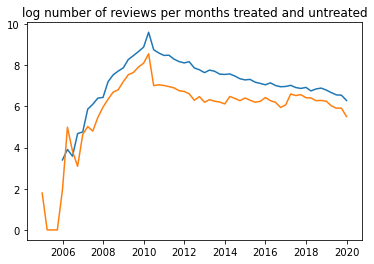

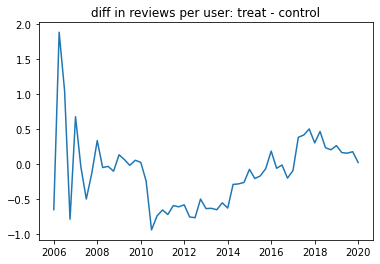

In [10]:
df_local = jones_question4(df_local,user_treat)

# Using activity per user and time

We are now interested in conducting some inference on our results. However we remember that the level of randomization is the `user` not the `review`. Hence we now decide to construct observation at the `(user,year)` level. We decide to use years instead of months because the probability at the month level is too low.

 1. Construct a DataFrame with all `(user,year)` pairs and a column called `post` which is equal to 1 if the user posted in that month and 0 if he didn't. To construct such dataframe I used the `pd.MultiIndex.from_product` function, but one could use a `merge` instead.
 2. Use this newly created DataFrame to plot the level for each group and each, and to plot the difference between the two.
 
Here are the plots I constructed:

In [11]:
def jones_question5(df_local, ust):
    df_l2 = df_local
    df_l2['year'] = df_l2.date.dt.year
    df_l2['post'] = 1
    df_l2 = df_l2.drop(["date", "business_id", "stars"], axis=1)
    df_l2

    control = df_local[df_local.date.dt.year == 2010]
    control = control[control.date.dt.month == 1]
    syn_con = pd.DataFrame(control.user_id.unique())
    syn_con = syn_con[0].tolist()

    test = df_local.date.dt.year.unique()
    test = list(test)

    df_l3 = pd.MultiIndex.from_product([test, syn_con], names=['year','user_id']).to_frame(index=False)
    df_l3

    store = pd.merge(df_l2, df_l3, on=["user_id", "year"], how="right")
    store['post'] = store['post'].fillna(0)

    subgroup = store.drop_duplicates(["user_id", "year"])

    test = subgroup[subgroup.user_treat == 1]
    test2 = subgroup[subgroup.user_treat == 0]

    alpha = test.year.value_counts().to_frame()
    beta = test2.year.value_counts().to_frame()

    alpha = alpha / 1500
    beta = beta / 3346
    alpha['active'] = alpha['year']
    alpha['year'] = alpha.index

    beta['active'] = beta['year']
    beta['year'] = beta.index

    alpha = alpha.sort_values('year')
    beta = beta.sort_values('year')

    a = alpha.year
    b = alpha.active

    c = beta.year
    d = beta.active

    plt.plot(a,b)
    plt.plot(c,d)
    plt.show()
    
    x = b - d
    plt.plot(a,x)
    plt.show()
    
    return subgroup;

In [12]:
def jones_question5(df_local, ust):
    df_l2 = df_local
    df_l2['year'] = df_l2.date.dt.year
    df_l2['post'] = 1
    df_l2 = df_l2.drop(["date", "business_id", "stars"], axis=1)
    df_l2

    control = df_local[df_local.date.dt.year == 2010]
    control = control[control.date.dt.month == 1]
    syn_con = pd.DataFrame(control.user_id.unique())
    syn_con = syn_con[0].tolist()

    test = df_local.date.dt.year.unique()
    test = list(test)

    df_l3 = pd.MultiIndex.from_product([test, syn_con], names=['year','user_id']).to_frame(index=False)
    df_l3

    store = pd.merge(df_l2, df_l3, on=["user_id", "year"], how="right")
    store['post'] = store['post'].fillna(0)

    subgroup = store.drop_duplicates(["user_id", "year"])

    test = subgroup[subgroup.user_treat == 1]
    test2 = subgroup[subgroup.user_treat == 0]

    alpha = test.year.value_counts().to_frame()
    beta = test2.year.value_counts().to_frame()

    alpha = alpha / 1500
    beta = beta / 3346
    alpha['active'] = alpha['year']
    alpha['year'] = alpha.index

    beta['active'] = beta['year']
    beta['year'] = beta.index

    alpha = alpha.sort_values('year')
    beta = beta.sort_values('year')

    a = alpha.year
    b = alpha.active

    c = beta.year
    d = beta.active

    plt.plot(a,b)
    plt.plot(c,d)
    plt.show()
    
    x = b - d
    plt.plot(a,x)
    plt.show()

    return subgroup;

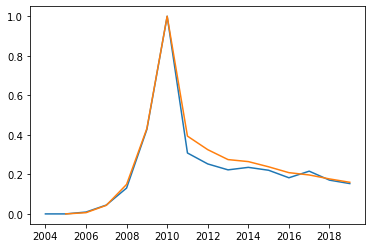

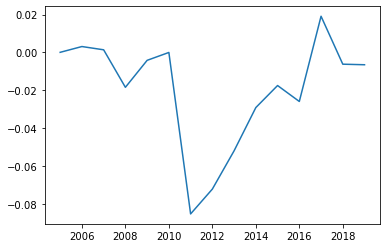

In [13]:
df_local_user = jones_question5(df_local,user_treat)

In [14]:
df_local_user

,review_id,user_id,user_treat,control,year,post
0,z4BCgTkfNtCu4XY5Lp97ww,jOERvhmK6_lo_XGUBPws_w,0.0,1.0,2009,1.0
43,slmv7dEs9FD3KsdbywTHUw,Ir__fU1m6dBqgTrP3aLP9A,0.0,1.0,2009,1.0
46,CBoURpsjIzGXkhmo3wC-5g,2VRkBZBS5FO_N7yBRWfaLA,0.0,1.0,2009,1.0
61,NaN,CGZD3Xkg7JsBIELPXyLzZg,NaN,NaN,2009,0.0
62,NaN,3I806vywudUaWV6yVGHE2w,NaN,NaN,2009,0.0
...,...,...,...,...,...,...
229380,NaN,_nx7shXxbK4mZl1G71R0og,NaN,NaN,2004,0.0
229381,NaN,GhtOZC5g0XItwPMOWsgYyA,NaN,NaN,2004,0.0
229382,NaN,qGt2-t-H2-6GmRxkZDDDcQ,NaN,NaN,2004,0.0
229383,NaN,jQTJX0MkM-ENDbdlH0w7Gw,NaN,NaN,2004,0.0


# Construct confidence inference

In this final question our goal is to add some inference to our plot. We are going to simply use the asymptotic variance implied by the OLS formula. Do the following:

 1. create a function that will take a dataframe containing the columns `post` and `treat` and returns the OLS estimate of `post` on `treat` together with the estimate of the variance of that estimate (Remember that in this simple case $\hat{\beta} = cov(y,x)/var(x)$ and that teh variance is $\sigma^2_\epsilon/(n \cdot var(x))$. Return the results as a new dataframe with one row and 2 columns.
 2. apply your function to your data from question 4 within eave `year` (you can do that using `pd.Grouper(freq='Y',key='date')` within a `groupby` and use the `apply` method.
 3. use your grouped results to plot the mean together with their 95% asymptotic conf interval
 4. comment on the results, in particular on date before the start of the experiment.
 
I report the plot I got:

In [15]:
import statsmodels.formula.api as sm
def question6_helper(df_local_user):
    result = sm.ols(formula="post ~ user_treat", data=df_local_user).fit()
    ols_est = pd.DataFrame({'beta_hat': [result.params[1]], 'var_hat': [result.bse[1]**2], 
                            'sd_hat': [result.bse[1]],
                            '95_CI' : [1.96*result.bse[1]]})
    return ols_est;

def beta_by_year(df_local_user):
    
    ust = pd.DataFrame(df_local_user[df_local_user['user_treat'] == 1]['user_id'].unique())
    ust = ust.rename(columns={0: "user_id"})
    ust['user_treat'] = 1

    final = df_local_user
    final = pd.merge(final, ust, on="user_id", how="left")
    final['user_treat_x'] = final['user_treat_x'].fillna(0)
    final['user_treat_y'] = final['user_treat_y'].fillna(0)
    final = final.assign(user_treat = final['user_treat_x'] + final['user_treat_y']).drop(['user_treat_x', 'user_treat_y', 'control'], axis=1)
    
    
    yr_df = pd.DataFrame(final.year.unique())
    yr_df = yr_df.rename(columns={0: "year"})
    yr_df = yr_df.sort_values('year')
    
    past = pd.DataFrame({'beta_hat' : [], 'var_hat' : [], 'sd_hat' : [], '95_CI' : []})
    
    for x in yr_df['year']:
        holder = final[final.year == x]
        ols = question6_helper(holder)
        ols_est = pd.concat([past,ols])
        past = ols_est
        
    return ols_est.set_index(yr_df['year']+1);

def jones_question6(df_local_user):
    subgroup = df_local_user
    
    test = subgroup[subgroup.user_treat == 1]
    test2 = subgroup[subgroup.user_treat == 0]

    alpha = subgroup[(subgroup.user_treat == 1) & (subgroup.post == 1)]
    beta = subgroup[(subgroup.user_treat == 0) & (subgroup.post == 1)]

    gold = pd.DataFrame(alpha.groupby('year')['post'].value_counts())
    gold = gold.rename(columns={'post': "treat_activity"})
    gold['control_activity'] = beta.groupby('year')['post'].value_counts()
    gold['control_activity'] = gold['control_activity'] / 3346.0
    gold['treat_activity'] = gold['treat_activity'] / 1500
    gold.index = gold.index.droplevel(1) + 1

    ret = pd.merge(beta_by_year(df_local_user), gold, on="year")
    
    graph = ret

    x = graph.index
    y = graph.treat_activity
    z = graph.control_activity

    w = y - z
    ret['diff'] = w
    
    lower_err = ret['diff'] - ret['95_CI']
    upper_err = ret['diff'] + ret['95_CI']
    asym_err = [lower_err, upper_err]
    
#     errorbar(x, y, yerr=error, fmt='-o')
   
    plt.errorbar(x, w, yerr=ret['95_CI'])
    plt.show()    
    return;

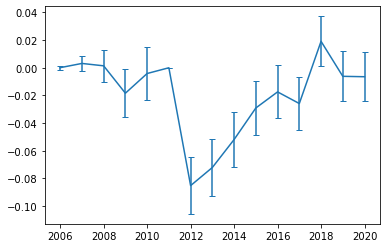

In [16]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 3})
jones_question6(df_local_user)

In [17]:
df_local_user

,review_id,user_id,user_treat,control,year,post
0,z4BCgTkfNtCu4XY5Lp97ww,jOERvhmK6_lo_XGUBPws_w,0.0,1.0,2009,1.0
43,slmv7dEs9FD3KsdbywTHUw,Ir__fU1m6dBqgTrP3aLP9A,0.0,1.0,2009,1.0
46,CBoURpsjIzGXkhmo3wC-5g,2VRkBZBS5FO_N7yBRWfaLA,0.0,1.0,2009,1.0
61,NaN,CGZD3Xkg7JsBIELPXyLzZg,NaN,NaN,2009,0.0
62,NaN,3I806vywudUaWV6yVGHE2w,NaN,NaN,2009,0.0
...,...,...,...,...,...,...
229380,NaN,_nx7shXxbK4mZl1G71R0og,NaN,NaN,2004,0.0
229381,NaN,GhtOZC5g0XItwPMOWsgYyA,NaN,NaN,2004,0.0
229382,NaN,qGt2-t-H2-6GmRxkZDDDcQ,NaN,NaN,2004,0.0
229383,NaN,jQTJX0MkM-ENDbdlH0w7Gw,NaN,NaN,2004,0.0


### Question 6.4
The data before the start of the experiment seems to have more heteroskedastic errors regarding the ols estimate of the variance.  After the experiment errors seem fairly consistent across time periods.  This is likely because the individuals who were used to generate the control and treatment groups in the experiment do not represent a random sample of the users in the experiment who were using yelp before January 2010

Congrats, you are done!